In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [9]:
df = pd.read_csv("gradient_decent.csv")
df.head()

,name,math,cs
0,david,92,98
1,laura,56,68
2,sanjay,88,81
3,wei,70,80
4,jeff,80,83


In [10]:
x = np.array(df['math'])
y = np.array(df['cs'])

In [11]:
def gradient_descent(x,y):
    m_curr = 0
    b_curr = 0
    iterations = 1000000
    n = len(x)
    learning_rate = 0.0002

    cost_previous = 0

    for i in range(iterations):
        y_predicted = m_curr * x + b_curr
        cost = (1/n)*sum([value**2 for value in (y-y_predicted)])
        md = -(2/n)*sum(x*(y-y_predicted))
        bd = -(2/n)*sum(y-y_predicted)
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
        if math.isclose(cost, cost_previous, rel_tol=1e-20):
            break
        cost_previous = cost
        #print ("m {}, b {}, cost {}, iteration {}".format(m_curr,b_curr,cost, i))#commented this line to decrease the size of this file

    return m_curr, b_curr

In [12]:
x = np.array(df.math)
y = np.array(df.cs)

m, b = gradient_descent(x,y)
print("Using gradient descent function: Coef {} Intercept {}".format(m, b))


Using gradient descent function: Coef 1.0177381667350405 Intercept 1.9150826165722297


In [13]:
def predict_using_sklean():
    df = pd.read_csv("gradient_decent.csv")
    r = LinearRegression()
    r.fit(df[['math']],df.cs)
    return r.coef_, r.intercept_

In [14]:
m_sklearn, b_sklearn = predict_using_sklean()
print("Using sklearn: Coef {} Intercept {}".format(m_sklearn,b_sklearn))

Using sklearn: Coef [1.01773624] Intercept 1.9152193111569176


In [15]:
def gradient_descent_plot(x,y):
    m_curr = b_curr = 0
    rate = 0.0002
    n = len(x)
    plt.scatter(x,y,color='red',marker='+',linewidth='5')
    for i in range(100000):
        y_predicted = m_curr * x + b_curr
        #print (m_curr,b_curr, i)
        plt.plot(x,y_predicted,color='green')
        md = -(2/n)*sum(x*(y-y_predicted))
        yd = -(2/n)*sum(y-y_predicted)
        m_curr = m_curr - rate * md
        b_curr = b_curr - rate * yd

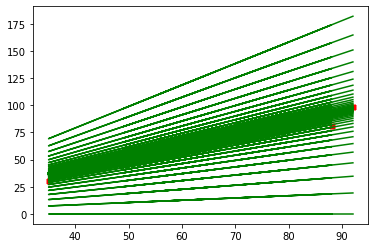

In [17]:
gradient_descent_plot(x,y)